In [2]:
!python3 -m pip install -U scikit-image


In [2]:
import numpy as np
from PIL import Image,ImageFont,ImageDraw
from PIL.ImageChops import add,subtract,difference,multiply,screen
import PIL.ImageStat as stat
from skimage.io import imread,imsave,imshow,show,imread_collection,imshow_collection
from skimage import color,exposure , img_as_float , data
from skimage.transform import SimilarityTransform,warp,swirl
from skimage.util import invert , random_noise , montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform,zoom
from scipy import misc
import cv2
%matplotlib inline

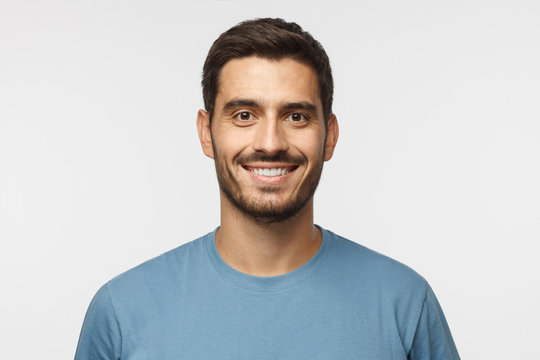

In [2]:
im = Image.open("lena.jpeg")
im


In [3]:
im = Image.open('lena.jpeg')
iml = im.convert('L')
imp = im.convert('P')

im.show()
iml.show()
imp.show()

540 360 L None <class 'PIL.Image.Image'>


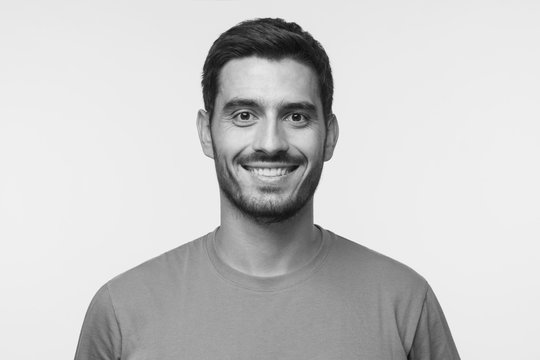

In [4]:
im = Image.open('lena.jpeg').convert('L')
print(im.width,im.height,im.mode,im.format,type(im))
im

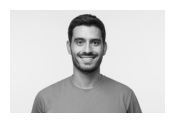

In [7]:
plt.figure(figsize=(2,2))
# plt.imshow(im)
plt.imshow(im,cmap = "grey")
plt.axis('off')
plt.show()

In [5]:
#converting image to mathematical array to perform funcs and transformations
x = np.array(im)
print(x.shape,x.dtype,x.min(),x.max())
print(x)


(360, 540) uint8 6 254
[[231 231 231 ... 232 232 232]
 [231 231 231 ... 232 232 232]
 [231 231 231 ... 232 232 232]
 ...
 [234 234 234 ... 232 232 232]
 [234 234 234 ... 232 232 232]
 [234 234 234 ... 232 232 232]]


In [9]:
# by using imread we can directly use im to show mathematical values and get matrix values.
im = imread("lena.jpeg" )   # <- lena.jpeg , L = luminance i.e intensity
im
# im.shape
#it gives 3D image as an output


array([[[232, 230, 231],
        [232, 230, 231],
        [232, 230, 231],
        ...,
        [232, 232, 232],
        [232, 232, 232],
        [232, 232, 232]],

       [[232, 230, 231],
        [232, 230, 231],
        [232, 230, 231],
        ...,
        [232, 232, 232],
        [232, 232, 232],
        [232, 232, 232]],

       [[232, 230, 231],
        [232, 230, 231],
        [232, 230, 231],
        ...,
        [232, 232, 232],
        [232, 232, 232],
        [232, 232, 232]],

       ...,

       [[234, 234, 234],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [232, 232, 232],
        [232, 232, 232],
        [232, 232, 232]],

       [[234, 234, 234],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [232, 232, 232],
        [232, 232, 232],
        [232, 232, 232]],

       [[234, 234, 234],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [232, 232, 232],
        [232, 232, 232],
        [232, 232, 232]]

0.0
0.034482758620689655
0.06896551724137931
0.10344827586206896
0.13793103448275862
0.1724137931034483
0.20689655172413793
0.24137931034482757
0.27586206896551724
0.3103448275862069
0.3448275862068966
0.3793103448275862
0.41379310344827586
0.4482758620689655
0.48275862068965514
0.5172413793103449
0.5517241379310345
0.5862068965517241
0.6206896551724138
0.6551724137931034
0.6896551724137931
0.7241379310344828
0.7586206896551724
0.7931034482758621
0.8275862068965517
0.8620689655172413
0.896551724137931
0.9310344827586207
0.9655172413793103
1.0


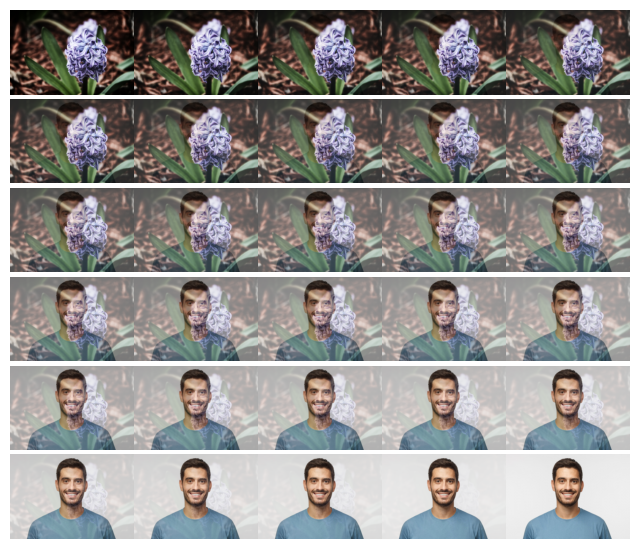

In [6]:
#image blending
#produce mulitple intermediate photos , then we run through speedily 
# which gives illusion of One image converting to another image

#Signal Super Imposition

#resizing both image to same size for blending as it is compulsory for blending
#modes of both imagee must be same if rgb then both rgb
#converting image to signal using normal distribution , where image normalize by dividing through highest intensity (255)
im1 = mpimg.imread("lena.jpeg")/255
im2 = Image.open('blue_flowers.jpg')
im3 = np.array(im2.resize((1200,822),Image.BILINEAR))/255

im1_resized = np.array(Image.fromarray((im1 * 255).astype('uint8')).resize((1200, 822), Image.BILINEAR)) / 255

# Plot the blended images
i = 1
plt.figure(figsize=(8, 15))
for alpha in np.linspace(0, 1, 30):
    print(alpha)
    plt.subplot(13, 5, i) #this line indicates vertical distance between images row
    o_img = (1 - alpha) * im3 + alpha * im1_resized
    plt.imshow(o_img)
    plt.axis('off')
    i += 1
    plt.subplots_adjust(wspace=0.005, hspace=0.005)

plt.show()
  

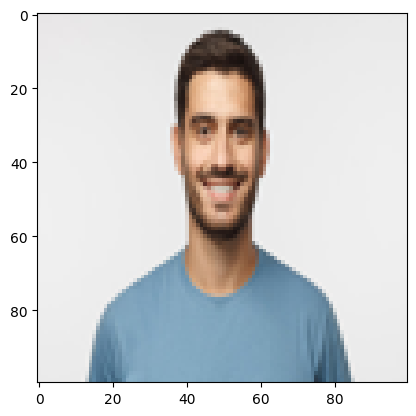

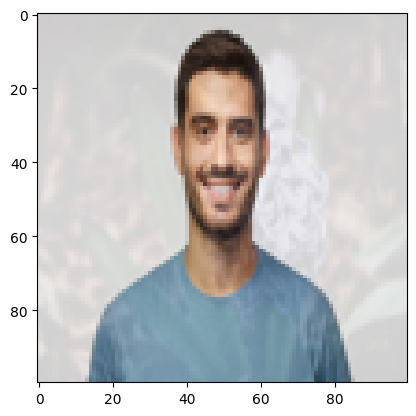

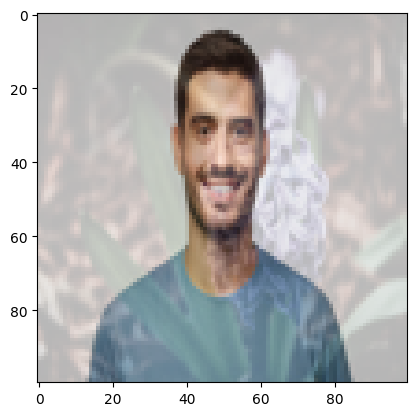

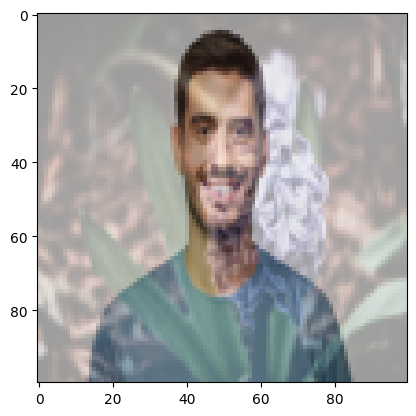

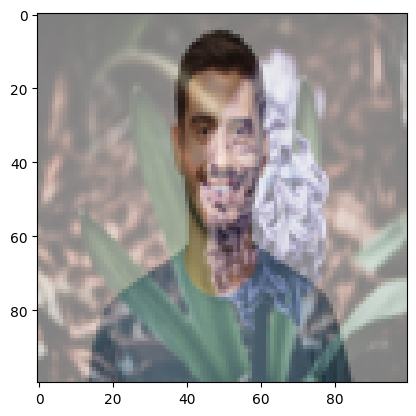

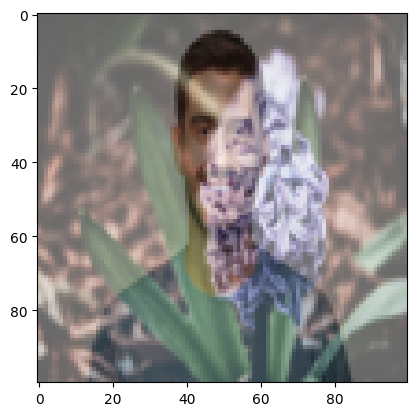

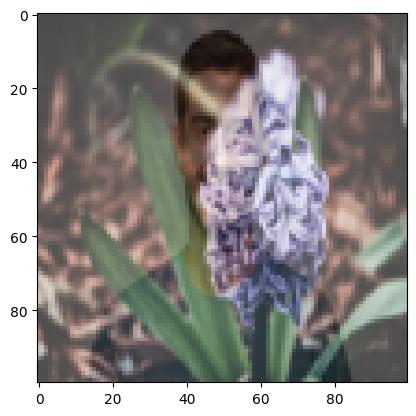

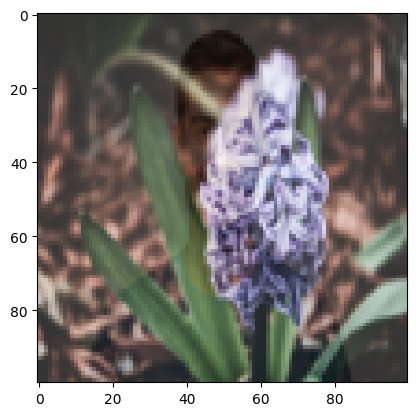

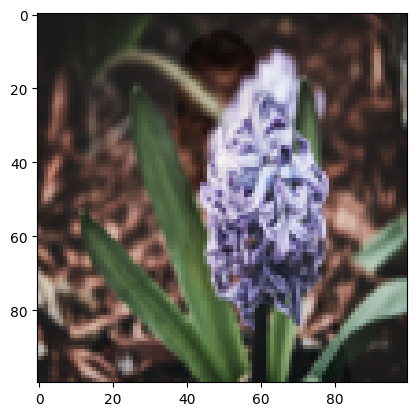

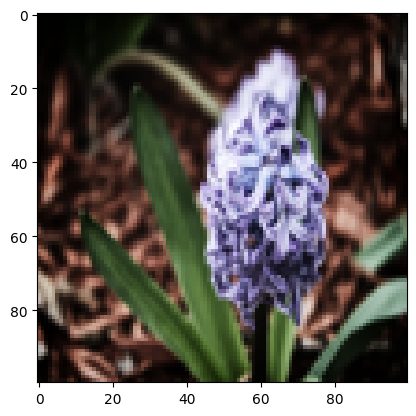

In [11]:
im1 = Image.open('lena.jpeg')
im1 = im1.resize((100,100))
im2 = Image.open('blue_flowers.jpg')
im2 = im2.resize((100,100))
for alpha in np.linspace(0,1,10):
    im4 = Image.blend(im1,im2,alpha)
    plt.imshow(im4)
    plt.show()

In [12]:
#Composition
im5 = Image.open('b2.jpeg')
im5_resize = im5.resize((564,612))
im6 = Image.open('male2.jpeg')


im5_resize = im5_resize.convert("RGBA")
im6 = im6.convert("RGBA")

mask = im6.copy()
mask.putalpha(150) #lesser alpha will dominate im5 image

# Composite the images using the mask
result = Image.composite(im6, im5_resize, mask)

# Show the result
result.show()


In [ ]:
from PIL import ImageChops as ic


im7 = Image.open('lena.jpeg')
im8 = Image.open('male2.jpeg')

im7 = im8.resize(im1.size)

result = ic.add(im7, im8)
result.show()


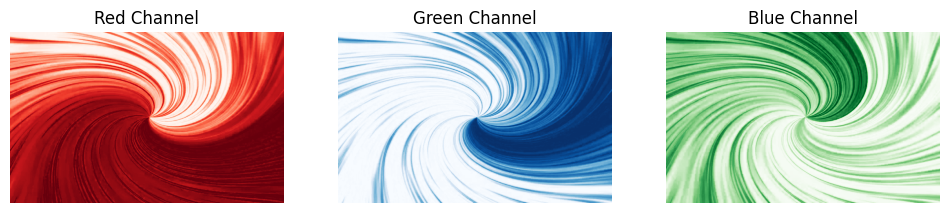

In [9]:
import cv2
import matplotlib.pyplot as plt

# Load the image
im9 = cv2.imread('color.webp')

# Split the channels
(B, G, R) = cv2.split(im9)

# Display the individual channels
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(R, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(G, cmap='Blues')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(B, cmap='Greens')
plt.title('Blue Channel')
plt.axis('off')

plt.show()


In [3]:
im10  = cv2.imread('b2.jpeg')
im10
cv2.waitKey(0)
cv2.imshow('im10',im10)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Read the image
image = cv2.imread('b2.jpeg')
grey = rgb2gray(image)

kernel_size = 15

# Create a motion blur kernel
kernel_motion_blur = np.zeros((kernel_size, kernel_size))
kernel_motion_blur[int((kernel_size-1)/2), :] = np.ones(kernel_size)
kernel_motion_blur = kernel_motion_blur / kernel_size

horizontalblur = np.zeros((21,21))
horizontalblur = cv2.line(horizontalblur,pt1=(21,10),pt2=(0,10),color=(255,),thickness=2)
# # plt.plot(horizontalblur)
# plt.imshow(horizontalblur,cmap="Greys")

# Apply the motion blur kernel to the image
motion_blur = cv2.filter2D(grey, ddepth=-1, kernel=horizontalblur)

# Display the original and motion-blurred images
cv2.imshow('Original', grey)
cv2.imshow('Motion Blur', motion_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()


2024-03-22 15:58:48.564 Python[7777:181457] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


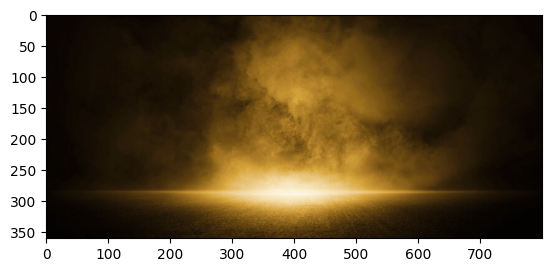

In [15]:
im10  = cv2.imread('b2.jpeg')
im10
plt.imshow(im10)

In [8]:
x = cv2.imread('female.jpeg') 
y = cv2.imread('blue_flowers.jpg')

source = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
dest = cv2.cvtColor(y,cv2.COLOR_BGR2RGB)

center = (dest.shape[1]//2 , dest.shape[0]//2)
rad = min(center[0], center[1])
mask = cv2.circle(np.zeros_like(dest), center, rad, [255, 255, 255],thickness=-1)

res = cv2.seamlessClone(
    source,
    dest,
    mask,
    center,
    cv2.NORMAL_CLONE,
)
plt.imshow(res)
plt.show()


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/core/src/matrix.cpp:809: error: (-215:Assertion failed) 0 <= roi.x && 0 <= roi.width && roi.x + roi.width <= m.cols && 0 <= roi.y && 0 <= roi.height && roi.y + roi.height <= m.rows in function 'Mat'


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images
source = cv2.imread('female.jpeg', cv2.IMREAD_UNCHANGED)
dest = cv2.imread('blue_flowers.jpg')

# Convert to RGB
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
dest = cv2.cvtColor(dest, cv2.COLOR_BGR2RGB)

# Calculate center and radius
center = (dest.shape[1] // 2, dest.shape[0] // 2)
rad = min(center[0], center[1])

# Create a circular mask
mask = cv2.circle(np.zeros_like(dest), center, rad,[255,255,255],-1)
    
result = cv2.seamlessClone(source, dest, mask, center, cv2.NORMAL_CLONE)
plt.figure(figsize=(14,7))
plt.imshow(result)
plt.axis('off')
plt.show()




error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/core/src/matrix.cpp:809: error: (-215:Assertion failed) 0 <= roi.x && 0 <= roi.width && roi.x + roi.width <= m.cols && 0 <= roi.y && 0 <= roi.height && roi.y + roi.height <= m.rows in function 'Mat'
